# 신경망 학습

- 학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습 목표! 

## 4.1 데이터에서 학습 한다
### 4.1.2 훈련 데이터와 시험 데이터
- 모델의 범용 능력을 제대로 평가하기 위해 훈련 데이터와 시험 데이터로 분리한다
- 훈련 데이터를 사용해 학습하며 최적의 매개변수를 찾는다
- 시험 데이터를 사용해 훈련한 모델읠 실력을 평가한다
- 오버피팅 : 한 데이터 셋에만 지나치게 최적화된 상태

## 4.2 손실 함수
- 신경망에서는 하나의 상태를 '지표'로 표기하고, 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다
- 손실 함수 : 평균 제곱 오차, 엔트로피 교차 오차 사용

### 4.2.1 평균 제곱 오차 (MSE)
- 원-핫 인코딩 : 한 원소만 1로 하고, 그 외는 0으로 나타내는 표기법
- 평균 제곱 오차 : 각 원소의 출력 (추정값) 과 정답 레이블 (참 값)의 차를 제곱한 후 ,그 총함을 구한다. 

In [1]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1, 0.05, 0.6, 0.0,0.05, 0.1, 0.0 , 0.1, 0.0 , 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

### 4.2.2 교차 엔트로피 함수
- 실질적으로 정담일 때 추정의 자연로그를 계산
- 오차는 정답일 떄의 출력이 전체 값을 정함
- 정답에 해당한는 출력이 커질 수록 0에 다가가다가, 출력이 1일 떄 0 이 된다.

In [2]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [3]:
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1, 0.05, 0.6, 0.0,0.05, 0.1, 0.0 , 0.1, 0.0 , 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

### 4.2.3 미니 배치 학습

- 미니 배치 : 훈련 데이터 로부터 일부만 골라 학습을 수행하는 것
- 미니 배치 학습 : 훈련 데이터에서 지정한 수를 무직위로 골라 학습시키는 것

In [4]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [8]:
(x_train, t_train) , (x_test,t_test)= load_mnist(normalize = True, one_hot_label = True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 0
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [10]:
np.random.choice(60000, 10)
#0 이상 100 미만인 수중에 무작위로 10개 고르는 것

array([23691, 15220, 51532, 52019,   619, 33955, 12326, 21000,  3955,
       40356])

### 4.2.5 왜 손실함수를 설명하는가?
- 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값 찾는다
- 가중치 매개변수의 손실 함수의 미분 : 가중치 매개변수의 값을 아주 조금 변화 시켰을 때, 손실 함수가 어떻게 변화느냐

- '정확도' 라고 표현하지 않는 이유 : 매개변수를 약간만 조정해서는 정확도 개선되지 않고 일정하게 유지되기 때문
- 계단 함수 vs 시그모이드 함수 : 계단 함수는 한순가만 변화를 일으키지만, 시그모이드는 어떤 장소라도 0이 되지 않는다

## 4.3 수치 미분

### 4.3.1 미분
- 미분 : 한순간의 변화량을 표시한 것

In [12]:
def numerical_diff(f,x):
    h = 10e-50
    return (f(x+h)-f(x))/h

위의 코드에서 개선해야하는 점

1. h를 0으로 무한히 보내고 싶어서 10e-50 이라는 값을 이용 -> 반올림 오차
    - 작은 값이 생략되어 최종 계산 결과에 오차 발생
    - 해결 방안 : 10**(-4)
2. 함수 f 의 차분
    - 이번 구현에서 미분은 (x+h)와 x 사이의 기울기에 해당
    - h 를 무한히 0으로 좁히는 것이 불가능해 생기는 한계
   


In [14]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예

In [15]:
def func1(x):
    return 0.01*x**2 + 0.1*x

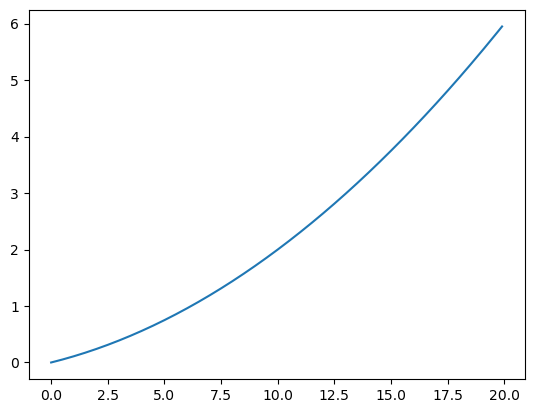

In [16]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0 , 20.0, 0.1)
y = func1(x)
plt.plot(x,y)
plt.show()

In [19]:
numerical_diff(func1, 5)
numerical_diff(func1, 10)

0.2999999999986347

### 편미분

- 변수가 여럿인 함수에 대한 미분
- 편미분은 특정 장소의 기울기를 구하되, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수 값은 고정

In [23]:
def func_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(func_tmp1, 3.0)

#x1을 4로 고정된 새로운 함수 정의하고 미분 함수 적용

6.00000000000378

### 기울기 (gradient)

- 모든 변수의 편미분을 벡터로 정리한 것 
- 기울기는 각 지점에서 낮아지는 방향을 가리킨다
#### 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

In [31]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val-h
        fxh2= f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

### 4.4.1 경사법 ( 경사 하강법)
- 경사법 : 현 위치에서 기울어진 방향으로 일정 거리만큼 이동
  이동한 곳에서도 기울기를 구하고, 기울어진 방향으로 나아가기를 반복해서 함수의 값을 점차 줄이는 것
  
- 학습률 : 매개변수 값을 얼마나 갱신하느냐를 정하는 것 ( 0.01, 0.001 )

In [32]:
def gradient_descent(f, init_x, lr = 0.01 , step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

In [33]:
def function_2(x):
    return x[0] ** 2 +x[1]**2

In [34]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)


array([-6.11110793e-10,  8.14814391e-10])

In [35]:
# 학습률이 큰 예시

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)


array([-2.58983747e+13, -1.29524862e+12])

In [36]:
# 학습률이 너무 작은 예시

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)


array([-2.99999994,  3.99999992])

하이퍼파라미터 : 사람이 직접 설정해야하는 매개변수     

가중치 매개변수(가중치, 편향) : 훈련 데이터와 학습  알고리즘에 의해 '자동'으로 획득되는 매개변수

### 4.4.2 신경망에서의 기울기
- w를 조금 변경했을 때 손실함수 L 이 얼마나 변화했느냐

In [3]:
import sys
import os
import numpy as np
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


# 4.4.2 신경망에서의 기울기
class simpleNet:
    """docstring for simpleNet"""
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss
    
    def f(w):
    return net.loss(x,t)



In [4]:
net = simpleNet()
print(net.W)

[[ 0.27362602  0.45117513 -0.3841255 ]
 [ 0.28726657  0.48085954 -2.06419377]]


In [7]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
np.argmax(p)

t  = np.array([0,0,1])
net.loss(x,t)

[ 0.42271552  0.70347866 -2.08824969]


3.388652225524378

In [9]:
f = lambda w : net.loss(x,t)
dW = numerical_gradient(f, net.W)
# dW = numerical_gradient(f,net.W)
print(dW)

[[ 0.24944605  0.33030147 -0.57974752]
 [ 0.37416907  0.4954522  -0.86962127]]


## 4.5 학습 알고리즘 구현하기

- 전제
신경망에는 가중치, 편향이 있고, 이 가중치과 편향을 훈련 데이터에 적응하도록 조정하는 과정이 '학습'

- 학습 단계
1. 미니 배치  : 훈련 데이터 중 일부를 무작위로 가져와서 선별한 데이터 ( 확률적 경사 하강법 ) -> 미니 배치        
    우리는 미니 배치의 손실 함수의 값을 줄이는 것이 목표!

2. 기울기 산출 : 미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.      
    기울기는 손실 함수 값을 가장 작게하는 방향을 제시

3. 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
    
4. 반복 : 1~3 단계 반복

### 4.5.1 2층 신경망 클래스 구현하기

In [16]:
import sys
import os
import numpy as np
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01 ):
    
        #가중치 초기화 
        self.params= {} # 신경망의 매개변수를 보관하는 딕셔너리 변수 
        self.params['W1'] = weight_init_std *np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std *np.random.randn(input_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(x,W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self,x,t): # predict 의 결과와 정답 레이블 바탕으로 교차 엔트로피 오차 구하도록 구현
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
    
    def accuracy(self, x,t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) /float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t): # 각 매개변수의 기울기 계산
        loss_W = lambda W : self.loss(x,t)
         
        grads ={} #기울기는 보관하는 딕셔너리 변수
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [17]:
net = TwoLayerNet(input_size= 784, hidden_size=100, output_size=10)

x = np.random.rand(100,784)
y = net.predict(x)

### 4.5.2 미니 배치 학습 구현하기
- 미니 배치 학습 : 훈련 데이터 중 일부를 무작위로 꺼내고, 그 미니 배치에 대하여 경사법으로 매개변수를 갱신하는 것

In [ ]:
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


# 4.5.2 미니배치 학습 구현하기
# * 주의 : 아주 오래 걸림 *
"""
60000개의 훈련 데이터에서 임의로 100개의 데이터(이미지&정답 레이블)을 추려냄.
100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다.
경사법에 의한 갱신 횟수를 1000번으로 설정하고 갱신할 때마다 손실 함수를 계산한다.
"""
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

# 하이퍼 파라메터
iters_num = 1000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)


0
1
2
3
4
5


### 4.5.3 시험 데이터로 평가하기

- 손실 함수의 값 : '훈련 데이터의 미니배치에 대한 손실함수'
- 훈련 데이터 외의 다른 데이터도 올바르게 인식하는지 확인 필요 -> '오버피팅' 확인 필요
    - 훈련데이터 이미지만 제대로 구분하고 , 그렇지 않은 것은 식별할 수 X
    

### 에폭
- 학습에서 훈련 데이터를 모두 소진했을 때의 횟수